In [1]:
def l(*t):
    print(t)
def ac(model,y_valid,X_valid ):
    print(accuracy_score(y_valid.tolist(),model.predict(X_valid)))
def dist(x1,y1,x2,y2):
    return np.linalg.norm(x1-x2) + np.linalg.norm(y2-y1)

'17 раз до 9 27сек'
'100 3.3 3мин'
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt


In [2]:
if(__name__!='__main__'):
    r_data=create_features(readCsv(nrows=100000))
    

In [3]:
def readCsv(nrows=10000):
    data=pd.read_csv('qwe000000000000.csv',
                 #dtype=types,
                 nrows=nrows,
                 parse_dates=['pickup_datetime',
                              #'dropoff_datetime',
                              
                             ],
                 usecols=
                         ['vendor_id',
                         'pickup_datetime',
                         #'dropoff_datetime',
                         'pickup_longitude',
                         'pickup_latitude',
                         'dropoff_longitude',
                         'dropoff_latitude',
                         'rate_code',
                         'passenger_count',
                         'trip_distance',

                         'fare_amount',
                         'tolls_amount',
                        ])
    return data

In [4]:
data=readCsv(nrows=10000)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
vendor_id            10000 non-null object
pickup_datetime      10000 non-null datetime64[ns]
pickup_longitude     10000 non-null float64
pickup_latitude      10000 non-null float64
dropoff_longitude    10000 non-null float64
dropoff_latitude     10000 non-null float64
rate_code            8973 non-null float64
passenger_count      10000 non-null int64
trip_distance        10000 non-null float64
fare_amount          10000 non-null float64
tolls_amount         10000 non-null float64
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 859.5+ KB


In [5]:
def create_features(sourcedata):
    data=sourcedata.copy()
    
    # create fare
    data['fare']=data['tolls_amount']+data['fare_amount']
    data=data.drop('tolls_amount',axis=1)
    data=data.drop('fare_amount',axis=1)
    
    # filter
    data=data[data['fare']>0]
    len(data[data['fare']>0])
    data=data[data.trip_distance>0]
    data=data[(data.pickup_longitude>-80)&(data.pickup_longitude<-20)] # -77
    data=data[(data.dropoff_longitude>-80)&(data.dropoff_longitude<-20)] # -77
    data=data[(data.dropoff_latitude>10)&(data.dropoff_latitude<60)] # 40
    data=data[(data.pickup_latitude>10)&(data.pickup_latitude<60)] # 40
    data=data[ data.rate_code.isnull()==False]
    #data=data[data['rate_code']!=np.nan]
    
    #
    data['p_hour']=data.pickup_datetime.map(lambda x: x.hour)
    data['p_dayofweek']=data.pickup_datetime.map(lambda x: x.dayofweek)
    data.drop('pickup_datetime',axis=1,inplace=True)
    
    # round
    data.pickup_latitude=data.pickup_latitude.apply(lambda x: np.round(x,2))#.apply(np.str)
    data.pickup_longitude=data.pickup_longitude.apply(lambda x: np.round(x,2))
    data.dropoff_latitude=data.dropoff_latitude.apply(lambda x: np.round(x,2))
    data.dropoff_longitude=data.dropoff_longitude.apply(lambda x: np.round(x,2))
    
    
    return data
data2=create_features(data)
data2


,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,rate_code,passenger_count,trip_distance,fare,p_hour,p_dayofweek
11,CMT,-73.99,40.75,-74.13,40.65,5.0,1,12.80,75.45,0,5
17,CMT,-73.97,40.76,-74.05,40.79,5.0,2,7.10,9.75,23,1
18,CMT,-74.01,40.71,-74.03,40.74,5.0,2,4.50,9.75,22,4
19,CMT,-73.99,40.75,-74.04,40.75,5.0,1,4.10,9.75,21,1
213,VTS,-73.99,40.73,-73.99,40.73,1.0,1,0.01,2.50,15,0
334,CMT,-73.86,40.7,-73.86,40.71,1.0,1,0.10,2.50,17,4
563,VTS,-73.99,40.74,-73.99,40.74,1.0,2,0.01,2.50,18,5
565,VTS,-73.97,40.79,-73.97,40.79,1.0,1,0.03,2.50,12,3
572,VTS,-73.98,40.76,-73.98,40.76,1.0,1,0.05,2.50,13,5
573,VTS,-74.0,40.74,-74.0,40.74,1.0,2,0.13,2.50,13,0


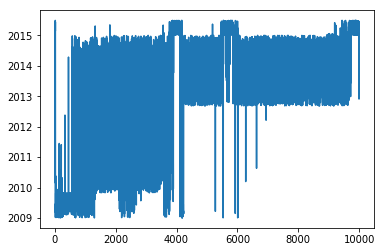

In [7]:

plt.plot(data.pickup_datetime)
#[q for q in data.pickup_datetime if q<pd.datetime(1920,10,10) ]

#data3=data2[(data2.pickup_longitude>-21)]

#dist(x1,y1,x2,y2):
#[dist(x.pickup_longitude,x.dropoff_longitude,1,1) for x in data]
#[x for x in data2.values]

In [8]:
data2.describe()


,rate_code,passenger_count,trip_distance,fare,p_hour,p_dayofweek
count,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000,6712.000000
mean,1.025030,1.634535,0.695134,3.231342,12.900030,3.103844
std,0.298458,1.351308,3.072978,1.061406,6.566305,1.980031
min,1.000000,0.000000,0.010000,2.500000,0.000000,0.000000
25%,1.000000,1.000000,0.200000,3.000000,8.000000,1.000000
50%,1.000000,1.000000,0.300000,3.500000,13.000000,3.000000
75%,1.000000,2.000000,0.400000,3.500000,18.000000,5.000000
max,6.000000,6.000000,99.800000,75.450000,23.000000,6.000000


In [9]:
# dists=[dist(x[1],x[2],x[3],x[4]) for x in data2.values]
# plt.plot(dists)
# plt.plot(data2.trip_distance,color='red')
# dd=pd.DataFrame(dists)

In [10]:
data2.pickup_latitude+'9'

11      40.759
17      40.769
18      40.719
19      40.759
213     40.739
334      40.79
563     40.749
565     40.799
572     40.769
573     40.749
575     40.829
579     40.719
586     40.749
587     40.859
588     40.759
592     40.779
593     40.789
594     40.779
597     40.779
601     40.819
604     40.739
609     40.749
612     40.719
614     40.739
615     40.769
617     40.759
619     40.759
622     40.769
628     40.649
630     40.779
         ...  
9969    40.769
9970    40.769
9971    40.749
9972    40.769
9973    40.779
9974    40.799
9975    40.739
9976    40.779
9977    40.689
9978    40.779
9979    40.739
9980    40.729
9981    40.789
9982    40.799
9983    40.779
9984    40.759
9985    40.759
9986    40.739
9987    40.689
9988    40.769
9989    40.769
9990    40.779
9991    40.789
9993    40.739
9994    40.759
9995    40.789
9996    40.769
9997     40.79
9998    40.779
9999    40.779
Name: pickup_latitude, Length: 6712, dtype: object